# Confidence Interval Exploration

### Introduction

Confidence intervals are used as a tool to estimate unknown population parameters. When making inference on data, we know it to merely be a sample from some overall population. Since we are not capturing the entire population, any parameters that we estimate are then *sample* point estimates of the popoulation parameter.

Confidence intervals are used to supplement point estimates. For any given point estimate, a confidence interval can be constructed -- this interval is a range of the possible values of the true population parameter. The level of confidence of an interval is determined by its significance level, i.e. a significance level of $\alpha$ corresponds to a (1-$\alpha$)% confidence interval. 

According to [Wikipedia](https://en.wikipedia.org/wiki/Confidence_interval):

***      
"Confidence intervals consist of a range of values (interval) that act as good estimates of the unknown population parameter; however, the interval computed from a particular sample does not necessarily include the true value of the parameter. When we say, "we are 99% confident that the true value of the parameter is in our confidence interval", we express that 99% of the hypothetically observed confidence intervals will hold the true value of the parameter."
***

This is a bit wordy and possibly a bit confusing. I think that naturally, people want to think of confidence intervals as *probability* intervals. That is, a 95% confidence interval doesn't mean that there is a 95% probability that the true population parameter is within the range. 

Instead, the confidence level depends on repeated sampling and estimation. If I were to run 100 replications of the analysis, I would believe that (1-$\alpha$)% of the 100 confidence intervals would contain the true population parameter.

With all of this being said, it still took me a while to really understand what this means. This notebook aims to provide a step by step investigation and visualization of confidence intervals.

### Population Mean

Let's first consider something rather simple, like estimating the mean. Let's simulate a population:

In [2]:
set.seed(1848)
options(warn = -1)
library(ggplot2)
pop <- data.frame(rnorm(n = 1000000,mean = 10, sd=20))
colnames(pop) <- "pop"

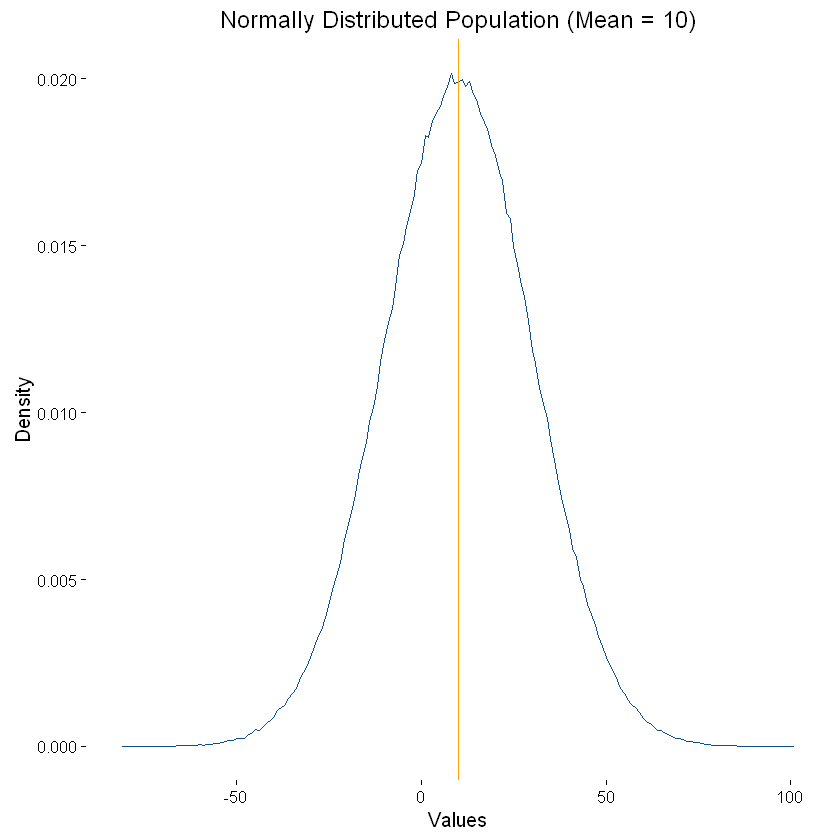

In [3]:
ggplot(data=pop, aes(pop,..density..)) + geom_freqpoly(binwidth=1,color="dodgerblue4") + 
        geom_vline(xintercept = mean(pop$pop),color="orange") + 
        ggtitle("Normally Distributed Population (Mean = 10)") +
        labs(x="Values",y="Density") + theme_classic() 

### Confidence Interval

So we have this overall population that we've created. In practice though, we probably won't ever have this true population. So let's take a sample and find a point estimate of its mean.

In [22]:
sample <- sample(x=pop$pop,size = 1000)
mean <- mean(sample)
s <- sd(sample)

Now that we have the mean, we want to construct a 95% confidence interval. Since we are pretending to not know the true population mean, we construct this confidence interval using the [t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution). Note that since we have relatively large degrees of freedom, our t-distribution will be approximately normal anyways. Thus, the confidence interval is given by

$$\bar{\mu} \pm t_{.05,n-1} \frac{s}{\sqrt{n}}$$ 
with $t_.05 = 1.96$ ($t$ =1.96 corresponds to a 95% probability of our estimate falling within 1.96 standard deviations of the population mean) to obtain our confidence interval.

In [24]:
int <- c(mean-1.96*(s/sqrt(length(sample))),mean+1.96*(s/sqrt(length(sample))))
print(paste("A 95% confidence interval for mu is:","(",round(int,2)[1],",",round(int,2)[2],")"))

[1] "A 95% confidence interval for mu is: ( 8.56 , 11.04 )"


### Repeated Sampling

However, this is only one confidence interval. Remember, we have no way of knowing whether or not this captures the true population parameter. So why do we even attach a confidence level? Like I mentioned before, it relies on replications. So what we'll do now is take 100 different samples, and see how many times our confidence interval contains our true parameter (spoiler: it should be 95). 

In [10]:
simulations <- function(input){
    sample <- sample(x=pop$pop,size = 100)
    mean <- mean(sample);s <- sd(sample)
    int <- c(mean-1.96*(s/sqrt(length(sample))),mean+1.96*(s/sqrt(length(sample))))
    return(findInterval(mean(pop$pop),int)==1)
}

replications <- rep(0,100)
replications <- sapply(replications,FUN=simulations)
mean(replications)

[1] 0.96

What's interesting is that it isn't necessarily going to be exactly 95%. However, if we observe how our confidence interval behaves as we increase the number of replications:

In [16]:
simulations2<- function(i){
    replications <- rep(0,i)
    replications <- sapply(replications,FUN=simulations)
    return(mean(replications))
}

replications2 <- sapply(seq(100,5000,by=250),FUN=simulations2)

In [17]:
replication_df <- data.frame(seq(100,5000,by=250),replications2)
colnames(replication_df) <- c("Number_Replications","ConfLevel")

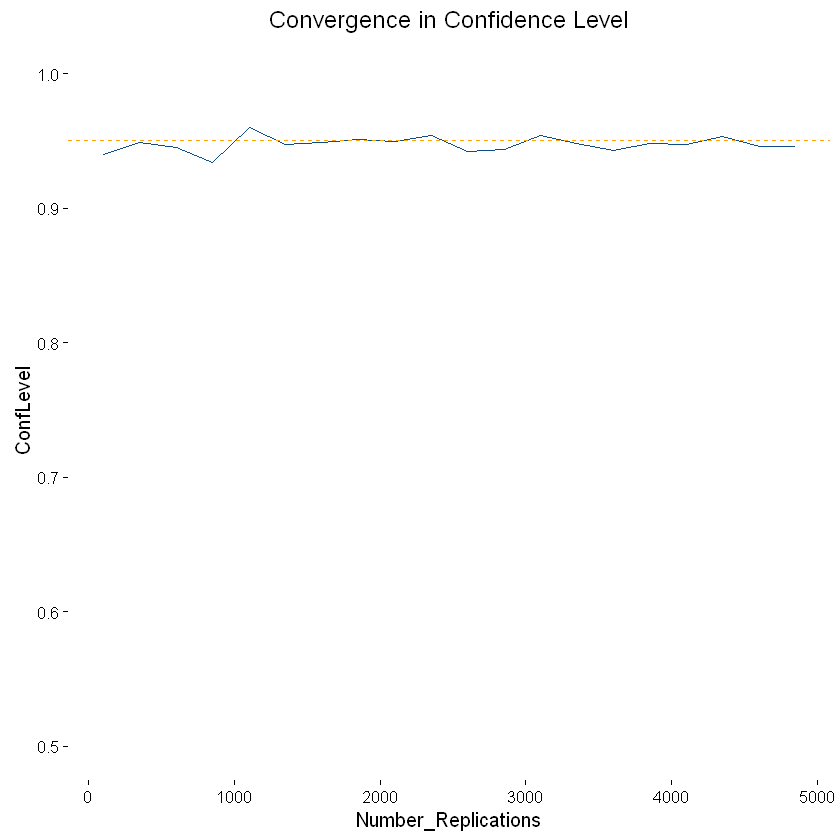

In [20]:
ggplot(data=replication_df,aes(x=Number_Replications,y=ConfLevel)) + scale_y_continuous(limits=c(0.5,1)) + 
        geom_line(color="dodgerblue4") + theme_classic() + ggtitle("Convergence in Confidence Level") +
        geom_hline(yintercept=0.95,color="orange",linetype=2)


So we can see that essentially, we are obtaining a true 95% proportion of confidence intervals that contain our true population parameter. 

### Summary

While far from a comprehensive overview of confidence intervals, hopefully this notebook was able to provide some insight into what the percentage attached to a confidence interval means. While it is tempting to think of it as a probability interval, the percentage is actually referring to how many confidence intervals would contain the true population parameter if the sampling is *repeated* many times.